In [1]:
from astropy.io import fits

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 

In [19]:
from matplotlib.colors import PowerNorm

In [3]:
# Open the fits file for cluster ngc1261
# The data is taken using F606W (WFPC2 Wide V) UVIS filter for 360s

fits_file = fits.open('ngc1261_f606w_v1_stack-0350s.fits')
img_data = fits_file[0].data

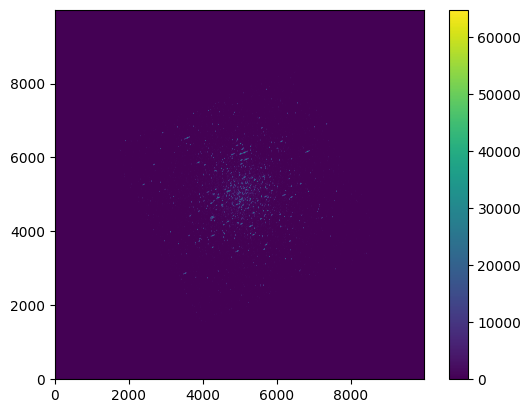

In [4]:
plt.figure()
plt.imshow(img_data,origin='lower')
plt.colorbar()
plt.show()

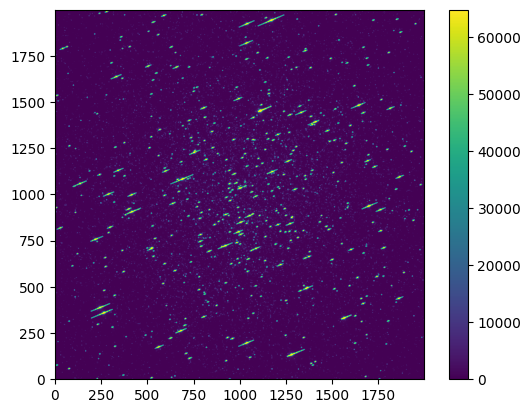

In [5]:
plt.figure()
plt.imshow(img_data[4000:6000,4000:6000],origin='lower')
plt.colorbar()
plt.show()

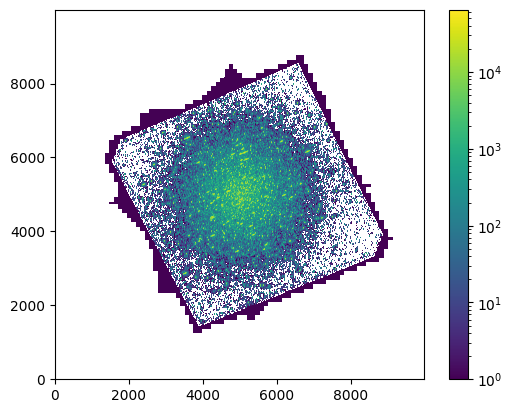

In [6]:
plt.figure()
plt.imshow(img_data,origin='lower',norm=LogNorm())
plt.colorbar()
plt.show()

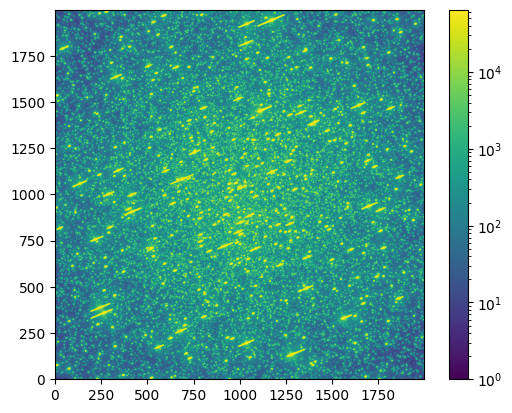

In [7]:
plt.figure()
plt.imshow(img_data[4000:6000,4000:6000],origin='lower',norm=LogNorm())
plt.colorbar()
plt.show()

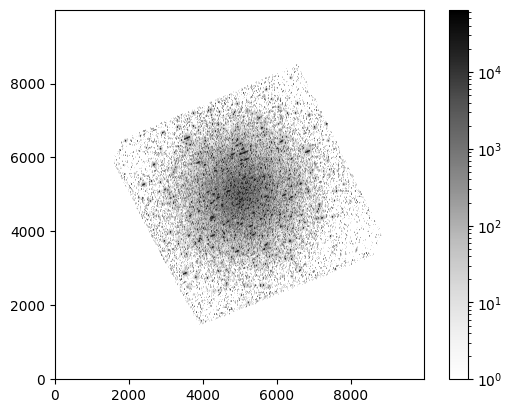

In [8]:
plt.figure()
plt.imshow(img_data,origin='lower',norm=LogNorm(),cmap='Greys')
plt.colorbar()
plt.show()

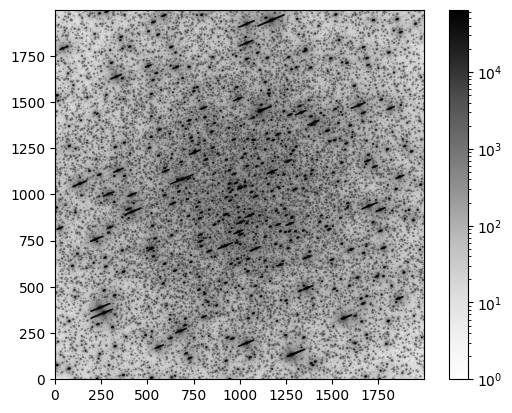

In [9]:
plt.figure()
plt.imshow(img_data[4000:6000,4000:6000],origin='lower',norm=LogNorm(),cmap='Greys')
plt.colorbar()
plt.show()

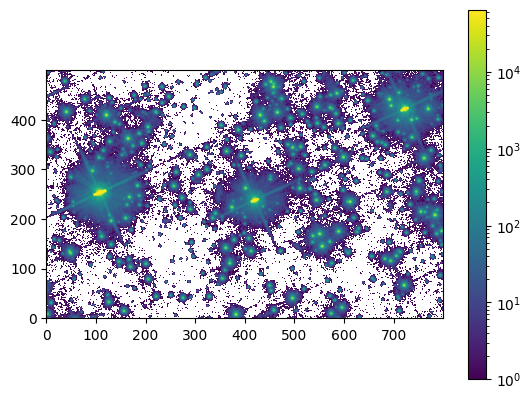

In [10]:
sec1 = img_data[2500:3000,3700:4500]

plt.figure()
plt.imshow(sec1,origin='lower',norm=LogNorm())
plt.colorbar()
plt.show()

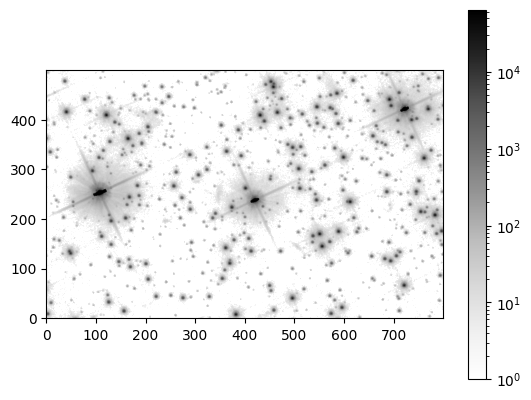

In [34]:
plt.figure()
plt.imshow(sec1,origin='lower',norm=LogNorm(),cmap='Greys')
plt.colorbar()
plt.show()

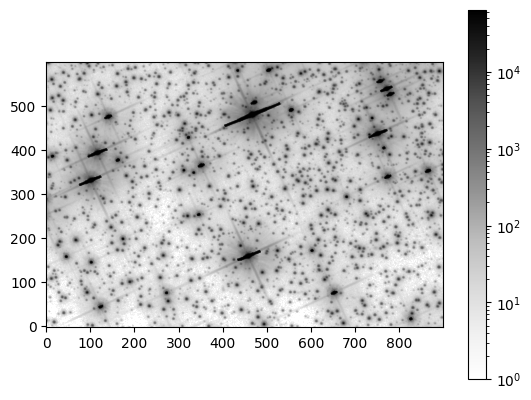

In [129]:
#section 2
sec2 = img_data[3400:4000,3800:4700]

plt.figure()
plt.imshow(sec2,origin='lower',norm=LogNorm(),cmap='Greys')
plt.colorbar()
plt.show()

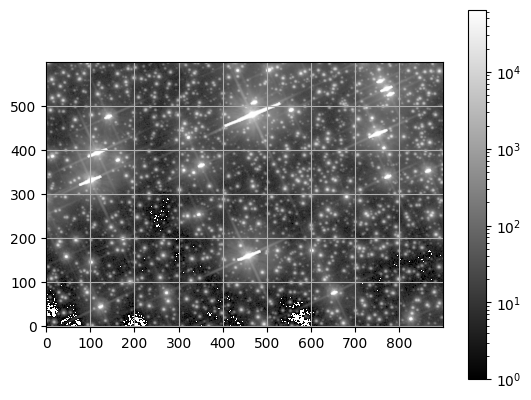

In [128]:
plt.figure()
plt.imshow(sec2,origin='lower',norm=LogNorm(),cmap='gray')
plt.grid()
plt.colorbar()
plt.show()

In [89]:
import numpy as np

from astropy.stats import sigma_clipped_stats

from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture

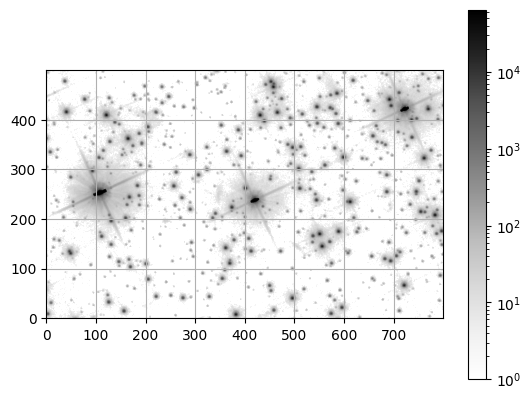

In [118]:
# sec1

plt.figure()
plt.imshow(sec1,origin='lower',norm=LogNorm(),cmap='Greys')
plt.colorbar()
plt.grid()
plt.show()

In [43]:
mean, median, std = sigma_clipped_stats(sec1,sigma=3.0)

print((mean,median,std))

(2.4344726, 0.0, 7.9308505)


In [86]:
daofind = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std)

sources = daofind(sec1-median)

for col in sources.colnames:
    if col not in ('id','npix'):
        sources[col].info.format = '%.2f'

sources.pprint(max_width=76)

 id xcentroid ycentroid sharpness roundness1 ... sky    peak    flux   mag 
--- --------- --------- --------- ---------- ... ---- -------- ------ -----
  1    329.77      0.80      0.54      -0.14 ... 0.00    49.00   1.09 -0.09
  2    631.61      0.89      0.48      -0.09 ... 0.00   331.00   7.70 -2.22
  3    772.46      2.89      0.50      -0.13 ... 0.00   201.00   4.44 -1.62
  4    260.62      4.93      0.58      -0.20 ... 0.00   135.00   2.82 -1.13
  5    382.29      6.62      0.51      -0.33 ... 0.00 24063.00 490.96 -6.73
  6      3.18      7.75      0.63      -0.15 ... 0.00  5921.00 115.47 -5.16
  7    574.23      8.47      0.61       0.20 ... 0.00  8414.00 169.74 -5.57
  8     71.29     11.47      0.55       0.10 ... 0.00    99.00   1.99 -0.75
  9    777.46     11.07      0.62      -0.31 ... 0.00    70.00   1.45 -0.41
 10    156.69     13.55      0.61      -0.27 ... 0.00  8731.00 168.53 -5.57
...       ...       ...       ...        ... ...  ...      ...    ...   ...
661    783.8

In [88]:
import numpy as np

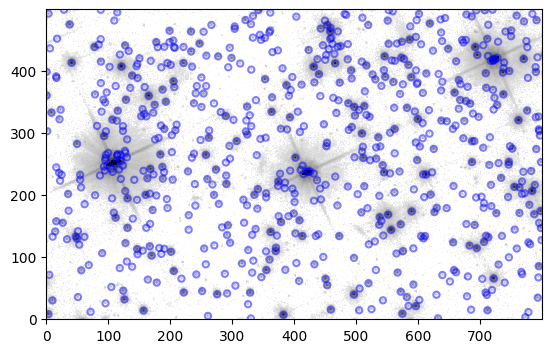

In [110]:
positions = np.transpose((sources['xcentroid'],sources['ycentroid']))
apertures = CircularAperture(positions, r = 5.0)
plt.imshow(sec1, cmap = 'Greys', origin = 'lower',norm = LogNorm(), interpolation = 'nearest')

apertures.plot(color='blue', lw = 1.5, alpha = 0.5);

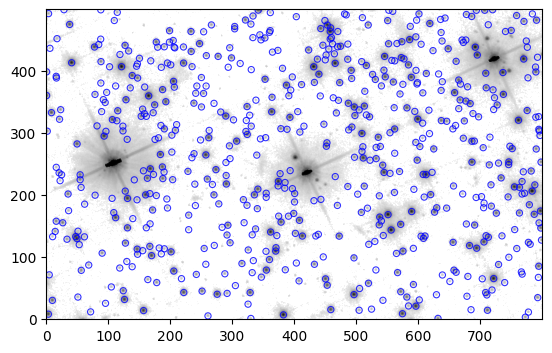

In [137]:
mask = np.zeros(sec1.shape,dtype=bool)

mask[220:280,80:140] = True
mask[210:270,400:460] = True
mask[400:460,700:760] = True

sources = daofind(sec1-median, mask = mask)
xpix = sources['xcentroid']
ypix = sources['ycentroid']

positions = np.transpose((xpix,ypix))
apertures = CircularAperture(positions, r = 5.0)

plt.imshow(sec1,cmap='Greys',norm=LogNorm(),origin='lower')
apertures.plot(color = 'blue',lw=0.8,alpha=0.8);

In [139]:
from photutils.aperture import CircularAnnulus, CircularAperture, ApertureStats, aperture_photometry

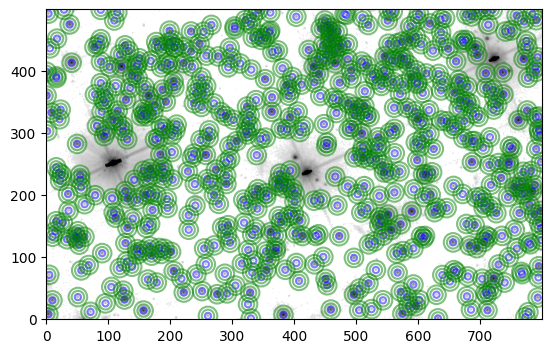

In [142]:
annulus_aperture = CircularAnnulus(positions, r_in = 10, r_out = 15)

plt.figure()
plt.imshow(sec1, cmap='Greys',norm=LogNorm(), origin='lower')
apertures.plot(color='blue',lw = 1.5, alpha = 0.5)
annulus_aperture.plot(color='green',lw = 1.5, alpha = 0.5)
plt.show()


In [147]:
aperstats = ApertureStats(sec1, annulus_aperture)
bkg_mean = aperstats.mean
aperture_area = apertures.area_overlap(sec1)
total_bkg = bkg_mean*aperture_area

star_data = aperture_photometry(sec1,apertures)
star_data['total_bkg'] = total_bkg

for col in star_data.colnames:
    star_data[col].info.format = '%0.8g'

star_data.pprint()


 id  xcenter   ycenter   aperture_sum total_bkg 
       pix       pix                            
--- --------- ---------- ------------ ----------
  1 329.77455 0.79611817    320.37769 -75.509966
  2  631.6117 0.89414011    2763.0601 -106.55963
  3 772.46461  2.8923169    1752.4475  -19.97464
  4 260.61574  4.9323511    927.82915 -273.95436
  5 382.29479  6.6185501    235605.03  988.38894
  6  3.176854  7.7490158    47904.577  297.03768
  7 574.22844  8.4735494    72002.946  602.05103
  8 71.287431  11.470378    933.95028  165.43961
  9  777.4594  11.069833    401.03243 -41.407811
 10 156.69444  13.546297    78922.374  132.25617
...       ...        ...          ...        ...
614  361.1577  494.16486    769.77197  525.35098
615 114.30816  494.56665    1208.0375  243.34429
616 558.62364  496.19305    838.26048  403.63756
617 341.66473  498.19984    41437.964  440.79418
618 552.28664  497.95301    450.69599  371.65799
619 693.44363  497.90971    4430.6898  6274.0447
620 706.99504  497.9

Find the Magnitude of a star:
$$
M = M_0 - 2.5 \log\frac{f-\gamma}{t} \\
$$

$ M = magnetude \\ $
$ M_0 = zero point \\ $ 
$ f = flux \\ $
$ \gamma = background radition \\ $
$ t = exposure time \\ $

In [159]:
fits_file.info()

Filename: ngc1261_f606w_v1_stack-0350s.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   (10000, 10000)   float32   


In [167]:
fits_file[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                10000                                                  
NAXIS2  =                10000                                                  
EXTEND  =                    T                                                  
CRPIX1  =     0.5003061426E+04                                                  
CRPIX2  =     0.5000727417E+04                                                  
CRVAL1  =     0.4806754200E+02                                                  
CRVAL2  =    -0.5521622200E+02                                                  
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CD1_1   =   -0.109849110E-04

In [179]:
date = '2006-03-10'
instrument = 'WFC'
filter = 'F606W'

In [177]:
from acstools import acszpt

In [180]:
q = acszpt.Query(date = date, detector=instrument)
zpt_table = q.fetch()
q_filter = acszpt.Query(date = date, detector=instrument, filt = filter)
filter_zpt = q_filter.fetch()

In [181]:
print(filter_zpt)

Filter PHOTLAM             PHOTFLAM            STmag  VEGAmag  ABmag 
       Angstrom erg / (Angstrom electron cm2) mag(ST)   mag   mag(AB)
------ -------- ----------------------------- ------- ------- -------
 F606W   5919.7                    7.7915e-20  26.671  26.415  26.501


In [183]:
zpt_table.pprint()

Filter PHOTLAM             PHOTFLAM            STmag  VEGAmag  ABmag 
       Angstrom erg / (Angstrom electron cm2) mag(ST)   mag   mag(AB)
------ -------- ----------------------------- ------- ------- -------
 F435W   4329.3                    3.1201e-19  25.165  25.789  25.675
 F475W   4745.8                    1.8123e-19  25.754  26.171  26.065
 F502N   5023.0                    5.2075e-18  22.108  22.385  22.296
 F550M   5581.3                    3.9676e-19  24.904  24.839  24.862
 F555W   5360.2                    1.9522e-19  25.674  25.729   25.72
 F606W   5919.7                    7.7915e-20  26.671  26.415  26.501
 F625W   6311.2                    1.1869e-19  26.214  25.739  25.905
 F658N   6584.0                    1.9812e-18  23.158  22.387  22.757
 F660N   6599.4                    5.1794e-18  22.114  21.423  21.709
 F775W   7694.0                    9.9484e-20  26.406  25.269  25.667
 F814W   8047.9                    7.0156e-20  26.785  25.517  25.948
F850LP   9034.7     

In [191]:
zeropoint = 26.501
extime = 1750

In [194]:
magnetudes = []
for line in star_data:
    magnetudes.append(zeropoint-(2.5*np.log10(np.abs(line[3]-line[4])/extime)))

star_data['magnetudes'] = magnetudes
star_data.pprint(max_lines=-1, max_width=-1)

 id  xcenter    ycenter   aperture_sum total_bkg      magnetudes    
       pix        pix                                               
--- ---------- ---------- ------------ ---------- ------------------
  1  329.77455 0.79611817    320.37769 -75.509966 28.114665218611073
  2   631.6117 0.89414011    2763.0601 -106.55963 25.964034247791766
  3  772.46461  2.8923169    1752.4475  -19.97464 26.487177215407346
  4  260.61574  4.9323511    927.82915 -273.95436  26.90902952132868
  5  382.29479  6.6185501    235605.03  988.38894 21.182698086354343
  6   3.176854  7.7490158    47904.577  297.03768 22.914405789186223
  7  574.22844  8.4735494    72002.946  602.05103 22.474335985620773
  8  71.287431  11.470378    933.95028  165.43961 27.394470369066397
  9   777.4594  11.069833    401.03243 -41.407811 27.993958569309985
 10  156.69444  13.546297    78922.374  132.25617 22.367415743094277
 11   504.4378  14.065899     1389.643  20.837094  26.76774042068705
 12  711.40376  13.985296    13021